In [14]:
import pandas as pd
import spacy
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Data Loading

In [3]:
# import data
reviews_df = pd.read_csv('/content/drive/MyDrive/reviews.csv')

# Data Exploration

In [4]:
reviews_df.info() # Display information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
reviews_df.head() # Display top 5 records

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


# Data Cleaning

In [6]:
reviews_df.isna().sum() # Find sum of missing values

,0
Review,1
Sentiment,0


In [7]:
reviews_df.dropna(inplace=True) # Drop missing values

In [8]:
reviews_df.isna().sum() # Find sum of missing values after dropping missing values

,0
Review,0
Sentiment,0


To predict the Sentiment as positive(1) or negative(0), we need to change them the values to those categories. So, if the sentiment value is less than or equal to 3, then it is negative(0) else positive(1).

In [9]:
# For 1,2,3 change 'Sentiment' to 0
reviews_df.loc[reviews_df['Sentiment']<=3,'Sentiment'] = 0

# For 4,5 change 'Sentiment' to 1
reviews_df.loc[reviews_df['Sentiment']>3,'Sentiment'] = 1

In [10]:
reviews_df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0


# Data Preprocessing

Preprocessing steps: <br/>
■ Remove stopwords, punctuation, and special characters.<br/>
■ Convert text to lowercase.<br/>
■ Tokenize and lemmatize the text.

In [11]:
# import stopwords
nltk.download('stopwords')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Define stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters & digits
    text = re.sub(r'[^A-Za-z\s]', '', str(text))
    text = text.lower()
    doc = nlp(text) # Tokenize using spacy
    # Remove stopwords & lemmatize
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return " ".join(tokens)

# Apply cleaning
reviews_df['cleaned_review'] = reviews_df['Review'].apply(preprocess_text)

# Save to new CSV
reviews_df.to_csv("/content/drive/MyDrive/cleaned_reviews.csv", index=False)

reviews_df[['Review','cleaned_review']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,cleaned_review
0,Fast shipping but this product is very cheaply...,fast shipping product cheaply make bring grand...
1,This case takes so long to ship and it's not e...,case take long ship even worth not buy
2,Good for not droids. Not good for iPhones. You...,good droid good iphone use feature watch iphon...
3,The cable was not compatible between my macboo...,cable compatible macbook iphone also connector...
4,The case is nice but did not have a glow light...,case nice glow light disappointed product not ...


# Data Analysis

In [12]:
reviews_df['Sentiment'].value_counts()  # Counts for positive and negative sentiments.

,count
Sentiment,
0,15000
1,9999


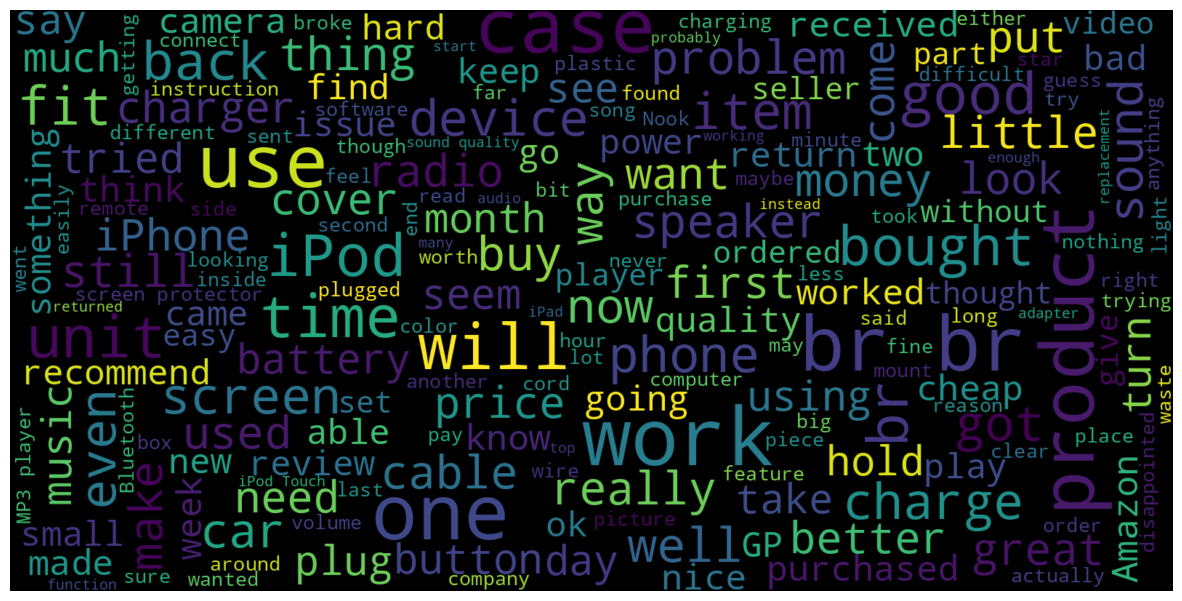

In [15]:
# Wordcloud of all the words with sentiment = 0
from wordcloud import WordCloud
consolidated=' '.join(word for word in reviews_df['Review'][reviews_df['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

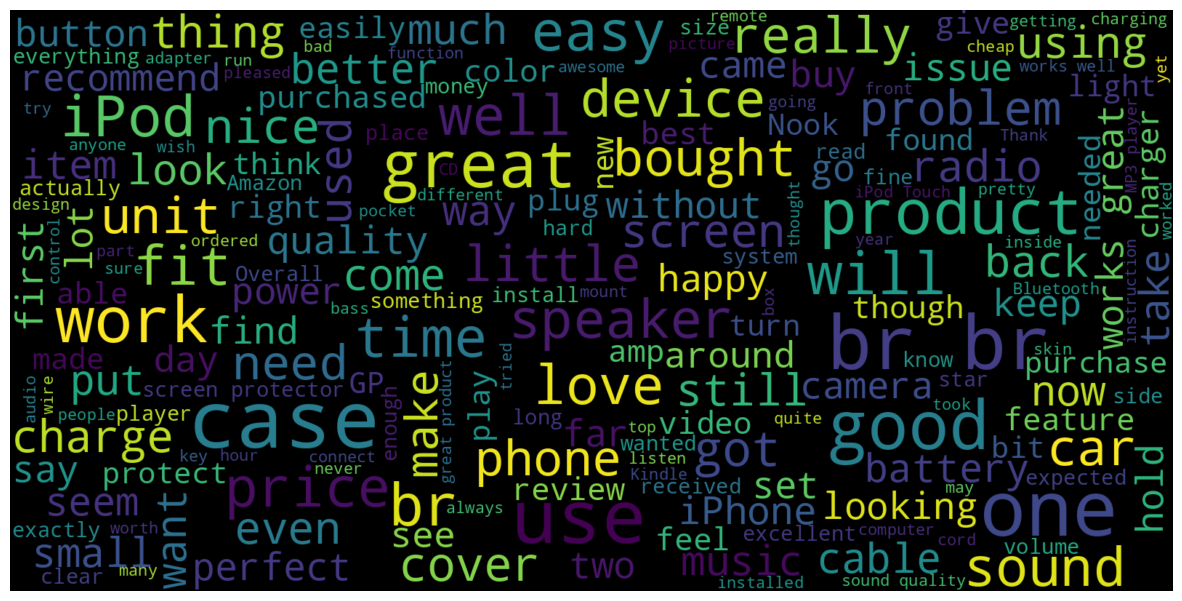

In [16]:
# Wordcloud of all the words with sentiment = 1
consolidated=' '.join(word for word in reviews_df['Review'][reviews_df['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

# Text Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer (you can set max_features or ngram_range)
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform
X_tfidf = vectorizer.fit_transform(reviews_df['cleaned_review'])

# Convert to DataFrame (optional)
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# Show TF-IDF features
print(tfidf_df.head())

    aa  aaa   ab  ability  able  abr  absolute  absolutely  absorb  abuse  \
0  0.0  0.0  0.0      0.0   0.0  0.0       0.0         0.0     0.0    0.0   
1  0.0  0.0  0.0      0.0   0.0  0.0       0.0         0.0     0.0    0.0   
2  0.0  0.0  0.0      0.0   0.0  0.0       0.0         0.0     0.0    0.0   
3  0.0  0.0  0.0      0.0   0.0  0.0       0.0         0.0     0.0    0.0   
4  0.0  0.0  0.0      0.0   0.0  0.0       0.0         0.0     0.0    0.0   

   ...  yrs  zagg  zebra  zen  zero  zip  zipper  zone  zoom  zune  
0  ...  0.0   0.0    0.0  0.0   0.0  0.0     0.0   0.0   0.0   0.0  
1  ...  0.0   0.0    0.0  0.0   0.0  0.0     0.0   0.0   0.0   0.0  
2  ...  0.0   0.0    0.0  0.0   0.0  0.0     0.0   0.0   0.0   0.0  
3  ...  0.0   0.0    0.0  0.0   0.0  0.0     0.0   0.0   0.0   0.0  
4  ...  0.0   0.0    0.0  0.0   0.0  0.0     0.0   0.0   0.0   0.0  

[5 rows x 5000 columns]


# Model training and evaluation

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = vectorizer.fit_transform(reviews_df['cleaned_review'])

# Labels
y = reviews_df['Sentiment']

# Split into train/test sets
X_train, X_test, y_train, y_test, df_train, df_test = train_test_split(X, y, reviews_df, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print Evaluation metrices
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", )
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.812

Confusion Matrix:


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      3006
           1       0.80      0.70      0.75      1994

    accuracy                           0.81      5000
   macro avg       0.81      0.79      0.80      5000
weighted avg       0.81      0.81      0.81      5000



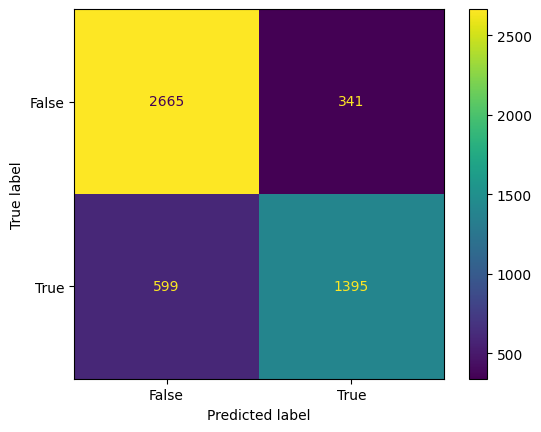

In [14]:
# Print confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

# Examples of reviews classified correctly and incorrectly

In [15]:
# Add predictions to df_test
df_test['predicted_sentiment'] = y_pred
df_test['actual_sentiment'] = y_test.values

In [16]:
# Correct predictions
correct = df_test[df_test['actual_sentiment'] == df_test['predicted_sentiment']]

# Incorrect predictions
incorrect = df_test[df_test['actual_sentiment'] != df_test['predicted_sentiment']]

# Show examples of reviews
print("\n✅ Correctly Classified Reviews:\n")
print(correct[['Review', 'actual_sentiment', 'predicted_sentiment']].head())

print("\n❌ Incorrectly Classified Reviews:\n")
print(incorrect[['Review', 'actual_sentiment', 'predicted_sentiment']].head())


✅ Correctly Classified Reviews:

                                                  Review  actual_sentiment  \
9668   Though this review is based on the Dell Pocket...                 0   
7488   I have a 98 Acura RL and this product did not ...                 0   
5804   plays okay except when you try to plug into ra...                 0   
12909  the cover did not properly fit the 30GB ipod c...                 0   
3386   the electrical plug doesn't work, so the only ...                 0   

       predicted_sentiment  
9668                     0  
7488                     0  
5804                     0  
12909                    0  
3386                     0  

❌ Incorrectly Classified Reviews:

                                                  Review  actual_sentiment  \
6868   I was looking for headset that is not Bluetoot...                 0   
19677    Works great...sounds great...easy to connect...                 1   
13640  Item came promptly and as described. I does wo

# Common features of positive and negative reviews.

In [19]:
import numpy as np

# Separate by sentiment
positive_reviews = X[reviews_df['Sentiment'].values == 1]
negative_reviews = X[reviews_df['Sentiment'].values == 0]

# Compute average of sentiments
positive_mean = np.asarray(positive_reviews.mean(axis=0)).flatten()
negative_mean = np.asarray(negative_reviews.mean(axis=0)).flatten()

# Create dataframes for top features
top_positive = pd.DataFrame({'word': feature_names, 'score': positive_mean}).sort_values(by='score', ascending=False).head(15)
top_negative = pd.DataFrame({'word': feature_names, 'score': negative_mean}).sort_values(by='score', ascending=False).head(15)

# Display top features
print("\n🌟 Top Words in Positive Reviews:")
print(top_positive)

print("\n💢 Top Words in Negative Reviews:")
print(top_negative)


🌟 Top Words in Positive Reviews:
         word     score
1889    great  0.051849
1858     good  0.044211
4921     work  0.039739
647      case  0.030819
2537     love  0.028831
4850     well  0.028831
4684      use  0.028469
3339  product  0.026504
2904      not  0.026391
2462     like  0.024581
3313    price  0.024253
2978      one  0.023031
1817      get  0.022761
4070    sound  0.022122
1649      fit  0.021117

💢 Top Words in Negative Reviews:
         word     score
2904      not  0.048632
4921     work  0.045621
1817      get  0.031040
647      case  0.027335
4684      use  0.026881
2978      one  0.026055
583       buy  0.025678
4940    would  0.025659
3339  product  0.025433
1858     good  0.023399
2258     ipod  0.021132
4850     well  0.020830
696    charge  0.019991
2462     like  0.018514
1649      fit  0.018169
